# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que uma determinada Hashtag investe: TV, Jornal e Rádio.

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

### Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que uma determinada Hashtag investe: TV, Jornal e Rádio.

- **TV**, **Jornal** e **Rádio** estão em **milhares** de reais

- **Vendas** estão em **milhões**


#### Importar a Base de dados

In [3]:
import pandas as pd

# Importando a tabela
tabela = pd.read_csv('db/advertising.csv')
display(tabela)


,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
# Verificar e a tabela não está com problemas
display(tabela.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

#### Análise Exploratória
- Visualizar como as informações de cada item estão distribuídas
- Analisar a **correlação** entre cada um dos itens

In [8]:
import seaborn as sns  # Criação de gráficos
import matplotlib.pyplot as plt  # Exibir os gráficos


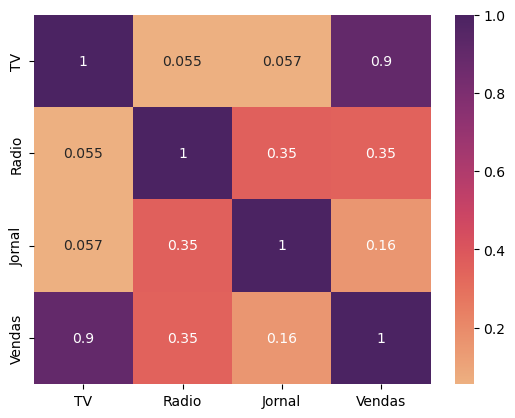

In [9]:
# Heatmap
sns.heatmap(tabela.corr(), cmap='flare', annot=True)
plt.show()


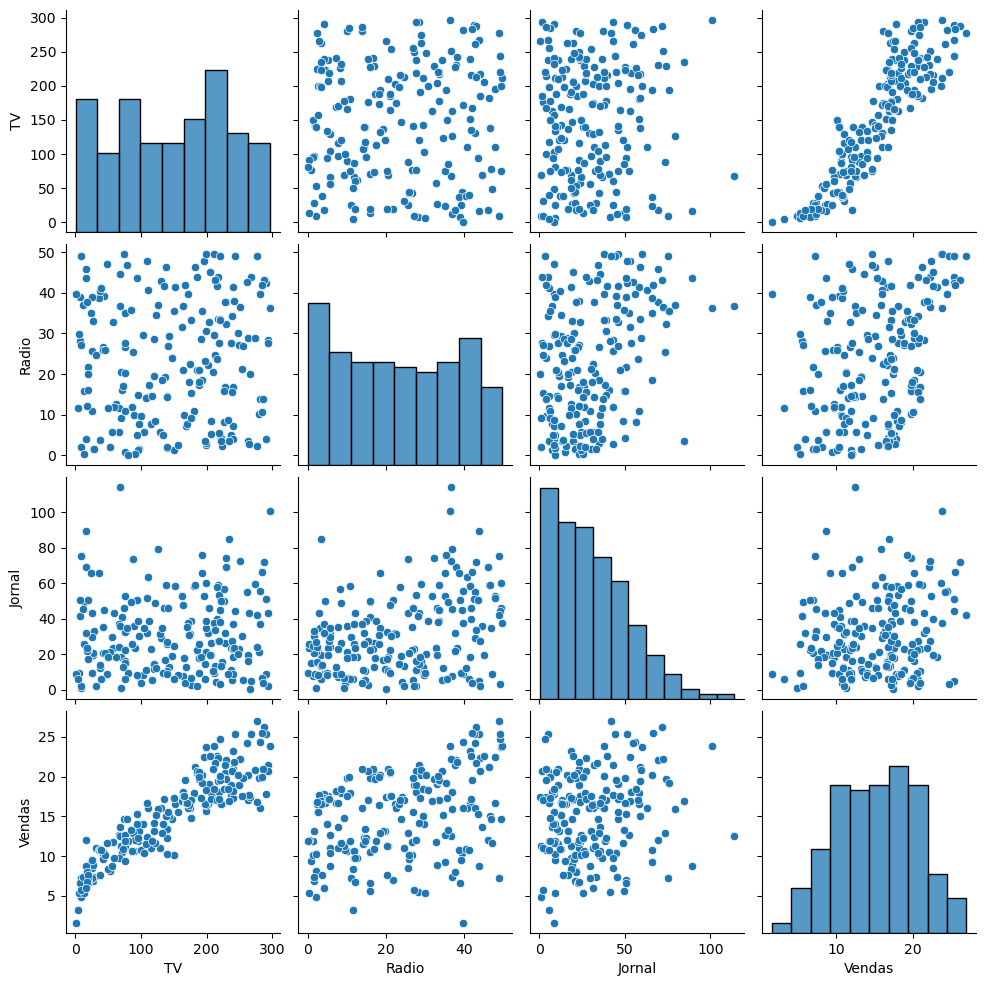

In [10]:
# Pairplot
sns.pairplot(tabela)
plt.show()


#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [15]:
# Divir as variáveis para treino e teste
from sklearn.model_selection import train_test_split

# X de teste -> resto
x = tabela.drop('Vendas', axis=1)  # Vai receber a tabela menos a coluna "Vendas"

# Y de teste -> o que queremos prever
y = tabela['Vendas']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)
# random_state=1 -> os valores aleatórios padronizados
# test_size -> Determina a porcentagem dos dados que será para testes

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [16]:
# Modelos de IA
from sklearn.linear_model import LinearRegression  # Regressão Linear
from sklearn.ensemble import RandomForestRegressor  # Árvore de Decisão

# Criar os modelos
modelo_LR = LinearRegression()  # LR -> Linear Regression
modelo_RFR = RandomForestRegressor()  # RFR -> Random Forest Regressor

# Treinar os modelos
modelo_LR.fit(x_treino, y_treino)
modelo_RFR.fit(x_treino, y_treino)


RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [17]:
from sklearn import metrics

# Analisa os dados de TV, Jornal e Rádio e determina as Vendas
previsao_LR = modelo_LR.predict(x_teste)
previsao_RFR = modelo_RFR.predict(x_teste)

# Confere com o valor real, e mede a acurácia da previsão
print(metrics.r2_score(y_teste, previsao_LR))
print(metrics.r2_score(y_teste, previsao_RFR))

# Random Forest Regressor detém a melhor acurácia

0.9047615712573235
0.9473755023078853


#### Visualização Gráfica das Previsões

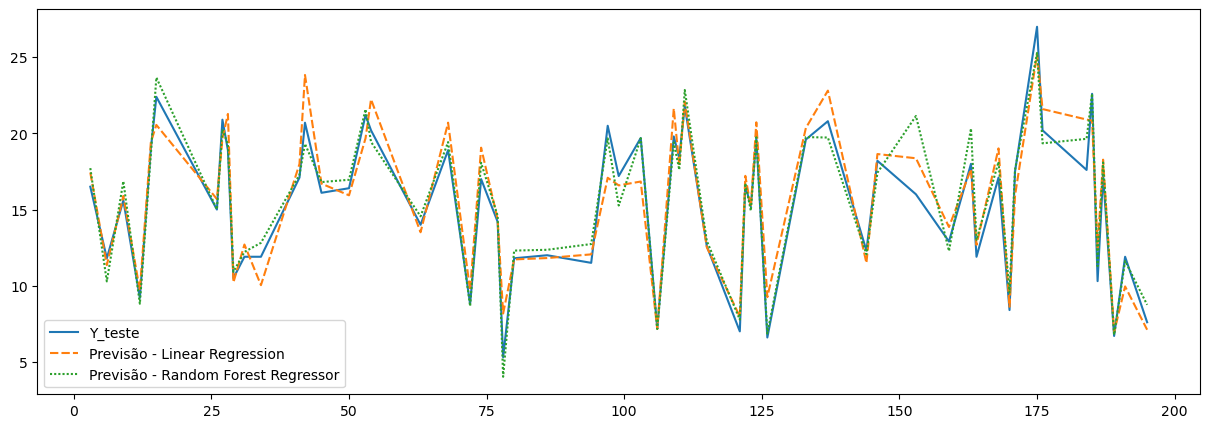

In [18]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['Y_teste'] = y_teste
tabela_auxiliar['Previsão - Linear Regression'] = previsao_LR
tabela_auxiliar['Previsão - Random Forest Regressor'] = previsao_RFR

plt.figure(figsize=[15, 5])
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [19]:
# Importar a nova base de dados
nova_tabela = pd.read_csv('db/novos.csv')
display(nova_tabela)


,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0
3,237.5,10.0,2.5
4,200.0,40.0,10.0
5,200.0,50.0,0.0
6,80.0,20.0,0.0
7,95.0,4.0,1.0
8,190.0,8.0,2.0


In [20]:
# Criar a previsão e atualizar o Data Frame
previsao = list(modelo_RFR.predict(nova_tabela))
nova_tabela['Previsão'] = previsao

display(nova_tabela)

,TV,Radio,Jornal,Previsão
0,23.1,3.8,69.2,7.343
1,44.5,0.0,5.1,8.918
2,170.2,45.9,0.0,20.483
3,237.5,10.0,2.5,17.744
4,200.0,40.0,10.0,21.848
5,200.0,50.0,0.0,23.214
6,80.0,20.0,0.0,11.852
7,95.0,4.0,1.0,12.793
8,190.0,8.0,2.0,16.898
